In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import random
import math
from scipy import stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn-darkgrid')

# train =  pd.read_csv('2016.csv', nrows = 50000, delimiter = ',')

#p = 1  # p% of lines
filename = 'flight_data.csv'
#random.seed(234)

# if random from [0,1] > p, skip row
df = pd.read_csv(filename)

In [13]:
DEP_DELAY = df.DEP_DELAY >= 15 
ARR_DELAY = df.ARR_DELAY >= 15 
bothDelayed = (df.DEP_DELAY >= 15) & (df.ARR_DELAY >= 15)
#print ("Percentage departure delays out of all flights (>15min): ", sum(departureDelayed)/float(len(df)))
#print ("Percentage arrival delays out of all flights (>15min): ", sum(arrivalDelayed)/float(len(df)))
#print ("Arrival delayed if departure was already delayed (>15min): ", sum(bothDelayed)/float(sum(arrivalDelayed)))

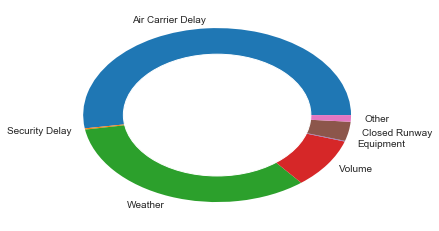

In [43]:
names='Air Carrier Delay', 'Security Delay', 'Weather', 'Volume', 'Equipment', 'Closed Runway', 'Other'
size=[52.45,0.23,33.13,9.28,0.13,3.56,1.23]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
df.DEP_DELAY = df.DEP_DELAY >= 15
df.ARR_DELAY = df.ARR_DELAY >= 15

In [39]:
df = df[df.DEP_DEL15 != 0]

C:\Users\abrea\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Text(0.5,1,'Delay by hour')

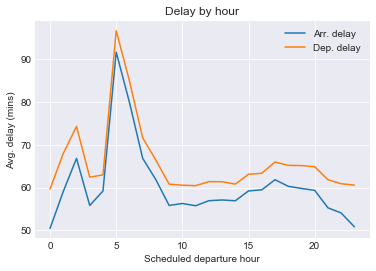

In [41]:
threshold = 0
TA = df[['CRS_DEP_TIME', 'ARR_DELAY', 'DEP_DELAY']]
#TA = df[['CRS_DEP_TIME', 'ARR_DELAY', 'DEP_DELAY', 'DEP_DEL_15']]
TA = TA[TA.ARR_DELAY.notnull() & TA.DEP_DELAY.notnull()] # Ignore entries with NaN values
#TA.ix[(TA.ARR_DELAY < 15), 'ARR_DELAY'] = 0 # Don't consider <15 min departures
#TA.ix[(TA.DEP_DELAY < 15), 'DEP_DELAY'] = 0
TA.ix[:, 'CRS_DEP_HOUR'] = (TA['CRS_DEP_TIME'].astype(int) / 100).astype(int)

TAgb = TA.groupby('CRS_DEP_HOUR').agg({'ARR_DELAY':['mean','count'], 'DEP_DELAY':['mean','count']})
TAgb = TAgb[(TAgb[('ARR_DELAY', 'count')] > threshold) & (TAgb[('DEP_DELAY', 'count')] > threshold)]
ax = TAgb.reset_index().plot(kind='line', x='CRS_DEP_HOUR', y=('ARR_DELAY', 'mean'), label='Arr. delay')
ax = TAgb.reset_index().plot(kind='line', x='CRS_DEP_HOUR', y=('DEP_DELAY', 'mean'), label='Dep. delay', ax=ax)

ax.set_xlabel('Scheduled departure hour')
ax.set_ylabel('Avg. delay (mins)')
ax.set_title('Delay by hour')

C:\Users\abrea\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\abrea\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\abrea\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-doc

Text(0.5,1,'Delay by month')

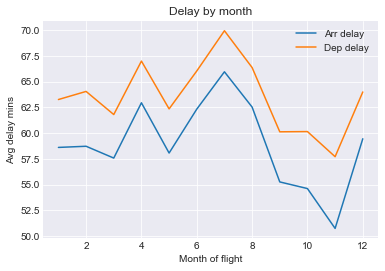

In [42]:
from datetime import datetime

def getMonth(datestring):
    dt = datetime.strptime(datestring, '%Y-%m-%d')
    return dt.month

MD = df[['FL_DATE', 'ARR_DELAY', 'DEP_DELAY']]
MD = MD[MD.ARR_DELAY.notnull() & MD.DEP_DELAY.notnull()] # Ignore entries with NaN values
MD.ix[(MD.ARR_DELAY < 0), 'ARR_DELAY'] = 0 # Don't consider early departures
MD.ix[(MD.DEP_DELAY < 0), 'DEP_DELAY'] = 0
MD.ix[:, 'MONTH'] = MD['FL_DATE'].apply(getMonth)

MDgb = MD.groupby('MONTH').agg({'ARR_DELAY':['mean','count'], 'DEP_DELAY':['mean','count']})
MDgb = MDgb[(MDgb[('ARR_DELAY', 'count')] > threshold) & (MDgb[('DEP_DELAY', 'count')] > threshold)]
ax = MDgb.reset_index().plot(kind='line', x='MONTH', y=('ARR_DELAY', 'mean'), label='Arr delay')
ax = MDgb.reset_index().plot(kind='line', x='MONTH', y=('DEP_DELAY', 'mean'), label='Dep delay', ax=ax)

ax.set_xlabel('Month of flight')
ax.set_ylabel('Avg delay mins')
ax.set_title('Delay by month')

Text(0.5,1,'Top 7 airports with weather delay')

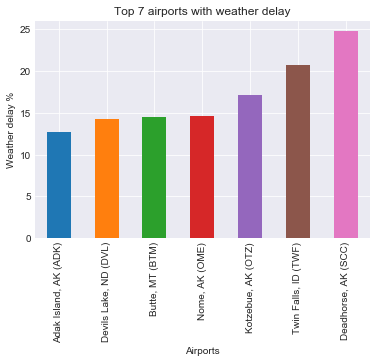

In [34]:
SD = df[['ORIGIN', 'ORIGIN_CITY_NAME', 'WEATHER_DELAY']]
SD = SD[SD.WEATHER_DELAY.notnull()]
SD['AT_FAULT'] = (SD.WEATHER_DELAY > 0) * 100
SD['ORIGIN_CITY_NAME'] = SD['ORIGIN_CITY_NAME'] + ' (' + SD['ORIGIN'] + ')'

SD = SD.groupby('ORIGIN').agg( {'AT_FAULT':['count', 'mean'], 'ORIGIN_CITY_NAME':'min'} )
SD = SD[ (SD['AT_FAULT']['count'] > 0) ] # Make sure flights are above threshold
SD = SD.sort_values(('AT_FAULT', 'mean'), ascending=False)

ax = SD.head(7).reset_index().iloc[::-1].plot(y=('AT_FAULT', 'mean'), x=('ORIGIN_CITY_NAME', 'min'), kind='bar', label='Delay',legend=False)
ax.set_xlabel('Airports')
ax.set_ylabel('Weather delay %')
ax.set_title('Top 7 airports with weather delay')

In [17]:
# plot delay groups by week of the year
# Within the first 16 weeks:
# - there seem to be periodic change in number of delays in groups 1-12.
# - group -2 to 0 seem invariant over time
# - the number of delays decreases in groups <- makes sense. The probability of delay decrease with the delay length
# - no significant influence of holidays
arrByDate = pd.pivot_table(data = df[['WeekofYear','ArrivalDelayGroups','Flights']], values = 'Flights',
                           index = 'WeekofYear',columns = 'ArrivalDelayGroups',aggfunc='sum')
fig,ax = plt.subplots(1,1,figsize=[15,7])
arrByDate.plot(cmap=plt.get_cmap('jet'),ax=ax)

for i in holidays[holidays.Year == 2017].index:
    plt.axvline(x=holidays.loc[i,'Week'],ymin=0,ymax=100000,color='k')
    week=holidays.loc[i,'Week']
    day=holidays.loc[i,'Date'].dayofweek+1
    txt=holidays.loc[i,'Holiday']
    plt.text(week-1,80000,
             str(day)+' - '+txt,
             rotation=90)
(arrByDate.sum(axis=1)).plot(ax=ax,color='k',linewidth=2,linestyle=':')
plt.text(10,32000,'Total Flights')
#plt.legend(arrivalDelayGroups,title='arrDelayGroup')
plt.yscale('log')
plt.xticks(range(0,64,2),range(0,64,2))
plt.xlabel('n$^{th}$ week of the year')
plt.ylabel('Number of Flights')
plt.title('Delays  over the year - 2010')
plt.show()

KeyError: "['WeekofYear' 'ArrivalDelayGroups' 'Flights'] not in index"

In [73]:
df['TAIL_NUM'].describe()

count     11266876
unique        5344
top         N492HA
freq          7086
Name: TAIL_NUM, dtype: object

Unique tail numbers / planes from the 56k sample are 4713 (8.4%). Most frequent flied plane within this sample is Hawaiian Airlines plane, which makes sense because a typical flight in Hawaii is < 1 hr.

Text(0,0.5,'Observations')

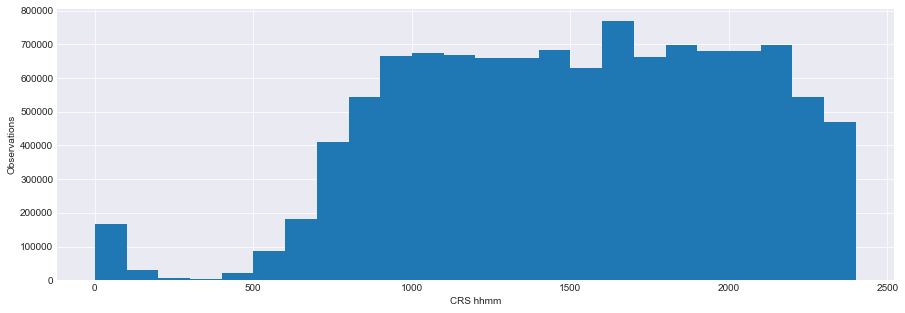

In [71]:
df['CRS_ARR_TIME'].hist(bins = 24, figsize = (15, 5))
plt.xlabel('CRS hhmm')
plt.ylabel('Observations')

In [16]:
print(df.describe().to_string())

          YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS    ORIGIN_WAC  DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  DEST_STATE_FIPS      DEST_WAC  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  DEP_DELAY_NEW     DEP_DEL15  DEP_DELAY_GROUP      TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  ARR_DELAY_NEW     ARR_DEL15  ARR_DELAY_GROUP     CANCELLED     DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME      AIR_TIME  FLIGHTS      DISTANCE  DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY    NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  DIV_AIRPORT_LANDINGS  DIV_REACHED_DEST  DIV_ACTUAL_ELAPSED_TIME  DIV_ARR_DELAY  DIV_DISTANCE  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  DIV1_WHEELS_ON  DIV1_TOTAL_GTIME  DIV1_LONGEST_GTIME  DIV1_WHEELS_OFF  DIV2_AIRPORT

In [70]:
df['SECURITY_DELAY'].describe()

count    1.993712e+06
mean     8.832519e-02
std      2.750647e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.270000e+02
Name: SECURITY_DELAY, dtype: float64

In [69]:
df['CARRIER_DELAY'].describe()

count    1.993712e+06
mean     2.008818e+01
std      5.994034e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.800000e+01
max      2.142000e+03
Name: CARRIER_DELAY, dtype: float64

In [68]:
df['WEATHER_DELAY'].describe()

count    1.993712e+06
mean     2.711446e+00
std      2.296430e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.934000e+03
Name: WEATHER_DELAY, dtype: float64

In [37]:
unique_airports = df['ORIGIN'].unique()
len(unique_airports)

325

In [85]:
df['ORIGIN_STATE_ABR']

0           MI
1           GA
2           CA
3           UT
4           MT
5           GA
6           TN
7           GA
8           FL
9           GA
10          MN
11          CA
12          GA
13          PA
14          UT
15          GA
16          NY
17          NY
18          GA
19          FL
20          GA
21          MN
22          VA
23          OH
24          MI
25          TX
26          UT
27          GA
28          TN
29          FL
30          CO
31          GA
32          GA
33          WA
34          FL
35          CT
36          GA
37          WA
38          NY
39          GA
40          NC
41          PA
42          FL
43          GA
44          FL
45          MN
46          CA
47          TX
48          GA
49          KY
50          MN
51          NY
52          GA
53          GA
54          GA
55          VA
56          NV
57          NC
58          KY
59          GA
60          IL
61          LA
62          MI
63          TN
64          CA
65          OH
66        

In [96]:
pd.options.display.max_rows = 345
df_2 = pd.DataFrame()
df_2['airports'] = df['ORIGIN']
df_2['state'] = df['ORIGIN_STATE_NM']
df_2 = df_2.sort_values(by=['state'])
df_2 = df_2.drop_duplicates()
df_2 = df_2.reset_index()
df_2 = df_2.drop(columns=['index'])
df_2

,airports,state
0,BHM,Alabama
1,HSV,Alabama
2,MGM,Alabama
3,MOB,Alabama
4,DHN,Alabama
5,ANC,Alaska
6,KTN,Alaska
7,JNU,Alaska
8,BET,Alaska
9,SIT,Alaska
